<a href="https://colab.research.google.com/github/CuriousDolphin/ml_vehicle_classification/blob/main/Vehicle_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Show/Hide code button
from IPython.display import HTML
HTML('''<script>
show=true; 
function toggle() {
 if (show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 show = !show
} 
$(document).ready(toggle);
</script>
<form action="javascript:toggle()"><input type="submit" value="Show/hide code"></form>''')

In [ ]:
%pip install sklearn-evaluation --quiet

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics # accuracy stuff 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.preprocessing import StandardScaler #normalize
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
from sklearn import neighbors,svm
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from sklearn import metrics # accuracy stuff 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.preprocessing import StandardScaler,MinMaxScaler #normalize
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

def plot_grid_search(gs_, grid_param_1, grid_param_2, name_param_1, name_param_2,model_name=""):
    cv_results=gs.cv_results_
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    plt.figure(figsize = (20,10))
    xi = list(range(len(grid_param_1)))  
    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        plt.plot(xi, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))
    
    xi = list(range(len(grid_param_1)))  
    plt.xticks(xi,grid_param_1)
    plt.title(f"Grid Search {model_name}", fontsize=20, fontweight='bold')
    plt.xlabel(name_param_1, fontsize=16)
    plt.ylabel('CV Average Score', fontsize=16)
    plt.legend(loc="best", fontsize=15)
    plt.grid('on')
    plt.show()
    
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, gs.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print("=========================================")
    print("GRID SEARCH Best score: %0.3f:" % gs.best_score_)
    print("=========================================")
    print("Best parameters:")
    for key,val in gs.best_params_.items():
      print(f"\t{key}: {val}")



def analyze_predictions(clf_,x_train,y_train,x_test,y_test,total_scores,model_name=""):
  n_classes=3
  y_predict = clf_.predict(x_test)
  y_prob = clf_.predict_proba(x_test)
  report = classification_report(y_test, y_predict,output_dict=False)
  report_= classification_report(y_test, y_predict,output_dict=True)
  accuracy=clf_.score(x_test, y_test)

  print("=========================================")
  print(f"Accuracy on test set {accuracy}")
  print("=========================================")
  print(f"{model_name.upper()} Classification Report:")
  print("=========================================")
  print(report)
  
  classes=['bus','car','van']
  print("=========================================")
  fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(30,10))
  ax1.grid(False)
  disp = plot_confusion_matrix(gs, x_test, y_test,
                      
                                  cmap=plt.cm.Blues,
                              ax=ax1
                                  )
  
  # CONFUSION MATRIX
  disp.ax_.set_title(f"Confusion_matrix {model_name}")
  

  # BINARIZE PROBLEM
  y_train=label_binarize(y_train, classes=classes)
  y_test=label_binarize(y_test, classes=classes)
  # classifier
  clf = OneVsRestClassifier(clf_)
  clf = clf.fit(x_train, y_train)
  y_score=clf.predict(x_test)
  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(3):
      fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
  # Compute micro-average ROC curve and ROC area
  

  # Plot of a ROC curve for a specific class
  #plt.subplots(nrows=2,ncols=2,figsize=(10, 10))
  #plt.figure(figsize=(20, 20))
  '''for i in range(len(classes)):
      plt.subplot(2,2,i+1)
      
      plt.plot(fpr[i], tpr[i], label='OneVsRestClassifier ROC curve (area = %0.2f)' % roc_auc[i])
      plt.plot([0, 1], [0, 1], 'k--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title(f"{classes[i].upper()} ROC curve ")
      plt.legend(loc="lower right")
  plt.show()'''

  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
      mean_tpr += interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes

  fpr["mean"] = all_fpr
  tpr["mean"] = mean_tpr
  roc_auc["mean"] = auc(fpr["mean"], tpr["mean"])
  lw = 2
  # Plot all ROC curves


  ax2.plot(fpr["mean"], tpr["mean"],
          label='mean-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["mean"]),
          color='navy', linestyle=':', linewidth=4)

  colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
  for i, color in zip(range(n_classes), colors):
      plt.plot(fpr[i], tpr[i], color=color, lw=lw,
              label='ROC curve of class {0} (area = {1:0.2f})'
              ''.format(classes[i], roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('multi-class ROC AUC analysis')
  plt.legend(loc="lower right")
  plt.show()
  total_scores[model_name]=dict()
  total_scores[model_name]['accuracy']=accuracy
  

  precisions=[]
  recalls=[]
  f1_scores=[]
  for class_name in classes:
    precisions.append(report_[class_name].get("precision"))
    recalls.append(report_[class_name].get("recall"))
    f1_scores.append(report_[class_name].get("f1-score"))

  total_scores[model_name]['precision (mean)']=np.mean(precisions)
  total_scores[model_name]['recall (mean)']=np.mean(recalls)
  total_scores[model_name]['roc_auc (mean)']=roc_auc["mean"]

def plot_bar_plot(data,size=(20,10),title=None,x=None,y=None):
    plt.figure(figsize=size)
    sns.set(style="darkgrid")
    g=sns.barplot(data=data,x=x,y=y)
    
    for p in g.patches:
      g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    if title:
      g.set_title(title)

    g.grid(True)

def plot_multiclass_roc(clf, X_test, y_test, n_classes=3, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()



![k_fold](https://www.politocomunica.polito.it/var/politocomunica/storage/images/media/images/marchio_e_logotipo_politecnico_di_torino/55127-3-ita-IT/marchio_e_logotipo_politecnico_di_torino_full.png)


# Classificazione di veicoli attraverso features estratte dalla silhouette

## Data Spaces 2021
## Ivan Murabito 





# Indice

* [Introduzione](#Introduzione)
* [Analisi dataset](#AnalisiDataset)
* [Riduzione dimensionlita'](#Riduzione)
* [Modelli di classificatori](#Classificatori)
* [Comparativa e conclusioni](#Comparazione)


# Introduzione




Lo scopo della tesina e' quello di analizzare un dataset,adattarlo e ottimizzarlo per successivamente applicare diversi modelli di classificatore al fine di dedurre quale sia il modello che si adatta meglio al problema.

il dataset in questione e':

**Vehicle silhuettes** : https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29



<a class="anchor" id="AnalisiDataset"></a>
# Analisi Dataset


![auto](https://www.seekpng.com/png/small/91-919145_vehicles-big-image-png-vehicles-silhouette.png)

Il dataset Vehicle Silhuettes e' composto da 846 osservazioni contenenti ciascuna 18 attributi indipendenti.

l'obiettivo e' quello di discriminare la tipologia di veicolo attraverso attributi estratti dalla silouette del veicolo (registrate da diverse angolazioni, ma ad un'altezza costante).



- dimensioni dataset:  846, 19
- 3 classes: **Car,Van,Bus**

La prima cosa che notiamo che non si tratta di un problema binario (True/false)
ma di un problema multinomiale; dobbiamo discriminare tre classi diverse.











## Valori di esempio

In [ ]:
df=pd.read_csv("drive/MyDrive/datasets/vehicle.csv")
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


## Tipi di dato 

Tutte le features sono valori di tipo numerico, 14 float64 e 4 interi,tuttavia i valori float nel datasaet non presentano valori decimali, quindi possiamo considerarli come interi.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


Una breve analisi statistica sulla distribuzione dei dati con i seguenti attributi:
- **count** numero di record per attributo
- **media** media dei valori dell'attributo
- **std** deviazione standard (quanto ogni valore si scosta dalla media aritmetica)
- **min** valore minimo dell'attributo
- **max** valore massimo dell'attributo
- **25%** lower percentile -> il 25% dei valori e' minore di quello visualizzatp
- **50%** medium percentile
- **75%** higher percentile


Da un analisi preliminare si puo' notare che il count non e' uguale per tutte le feature, questo ci indica che ci sono valori nulli.



## Drop missing values 

Controlliamo per prima cosa che non ci siano valori nulli, perche' potenzialmente dannosi per le fasi successive.


In [ ]:
df.isnull().sum()


compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

ci sono diversi valori nulli o non definiti, possiamo proseguire in diverse strade: 


### 1) Brutal delete records

l'approccio piu' semplice e' quello di rimuovere i record che contengono valori mancanti usando la funzione **df.dropna()** di pandas.

cosi' verranno eliminate 33 righe passando da 846 osservazioni (ma con dati mancanti) a 813 osservazioni.


In [ ]:
df_not_null = df.dropna(how='any') # It will erase every row that has "any" Null value in it.
print(df_not_null.isnull().sum())
df_not_null.shape

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64


(813, 19)

### 2) Fill missing values

un altro approccio possibile (e preferibile) e' quello di sostituire i valori mancanti con valori generati da:
  - media dei valori della colonna
  - valore stimato da un altro modello predittivo

proviamo la prima strada attraverso il comando **df.fillna()** sostituendo i valori mancanti con la media della colonna.

In [ ]:
df.fillna(df.mean(),inplace=True) # fill missing values with mean column values
print(df.isnull().sum())
print(df.shape)


compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64
(846, 19)


## Dataset distribution
Questo grafico ci mostra la quantita' di sample per ciascuna delle 3 classi.

Possiamo notare che le tre classi non sono bilanciate durante le osservazioni,
il valore delle auto e' praticamente doppio rispetto quello dei bus e dei van. successivamente ne terremo conto dopo la fase di split del dataset.

poiche' andremo a bilanciare 

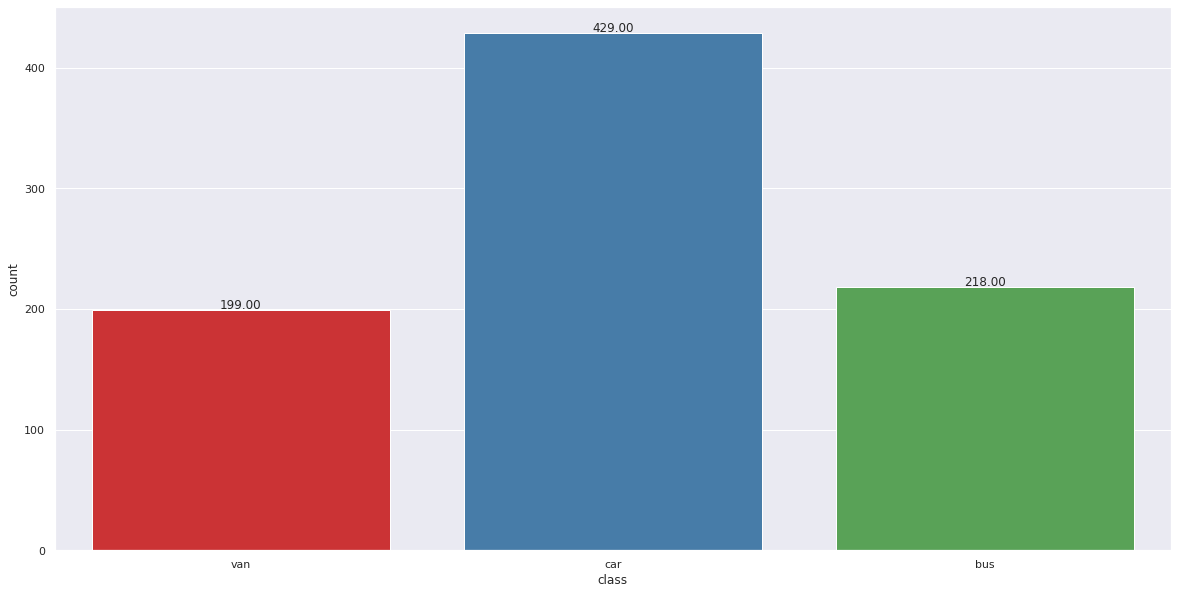

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
ax = sns.countplot(x="class", data=df, palette="Set1")
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')




### Histogram
rappresenta la distribuzione e il range di valori per ciascun attributo.

nell'asse y abbiamo il count delle osservazioni
mentre nell'asse x il valore stesso.

e' una rappresentazione molto semplice che ci fa capire come sono distribuite le features.


possiamo notare che alcune features si avvicinano alla distribuzione normale e che comunque in generale tutte le features hanno range di valori eterogenei tra loro, successivamente andremo a normalizzare il dataset

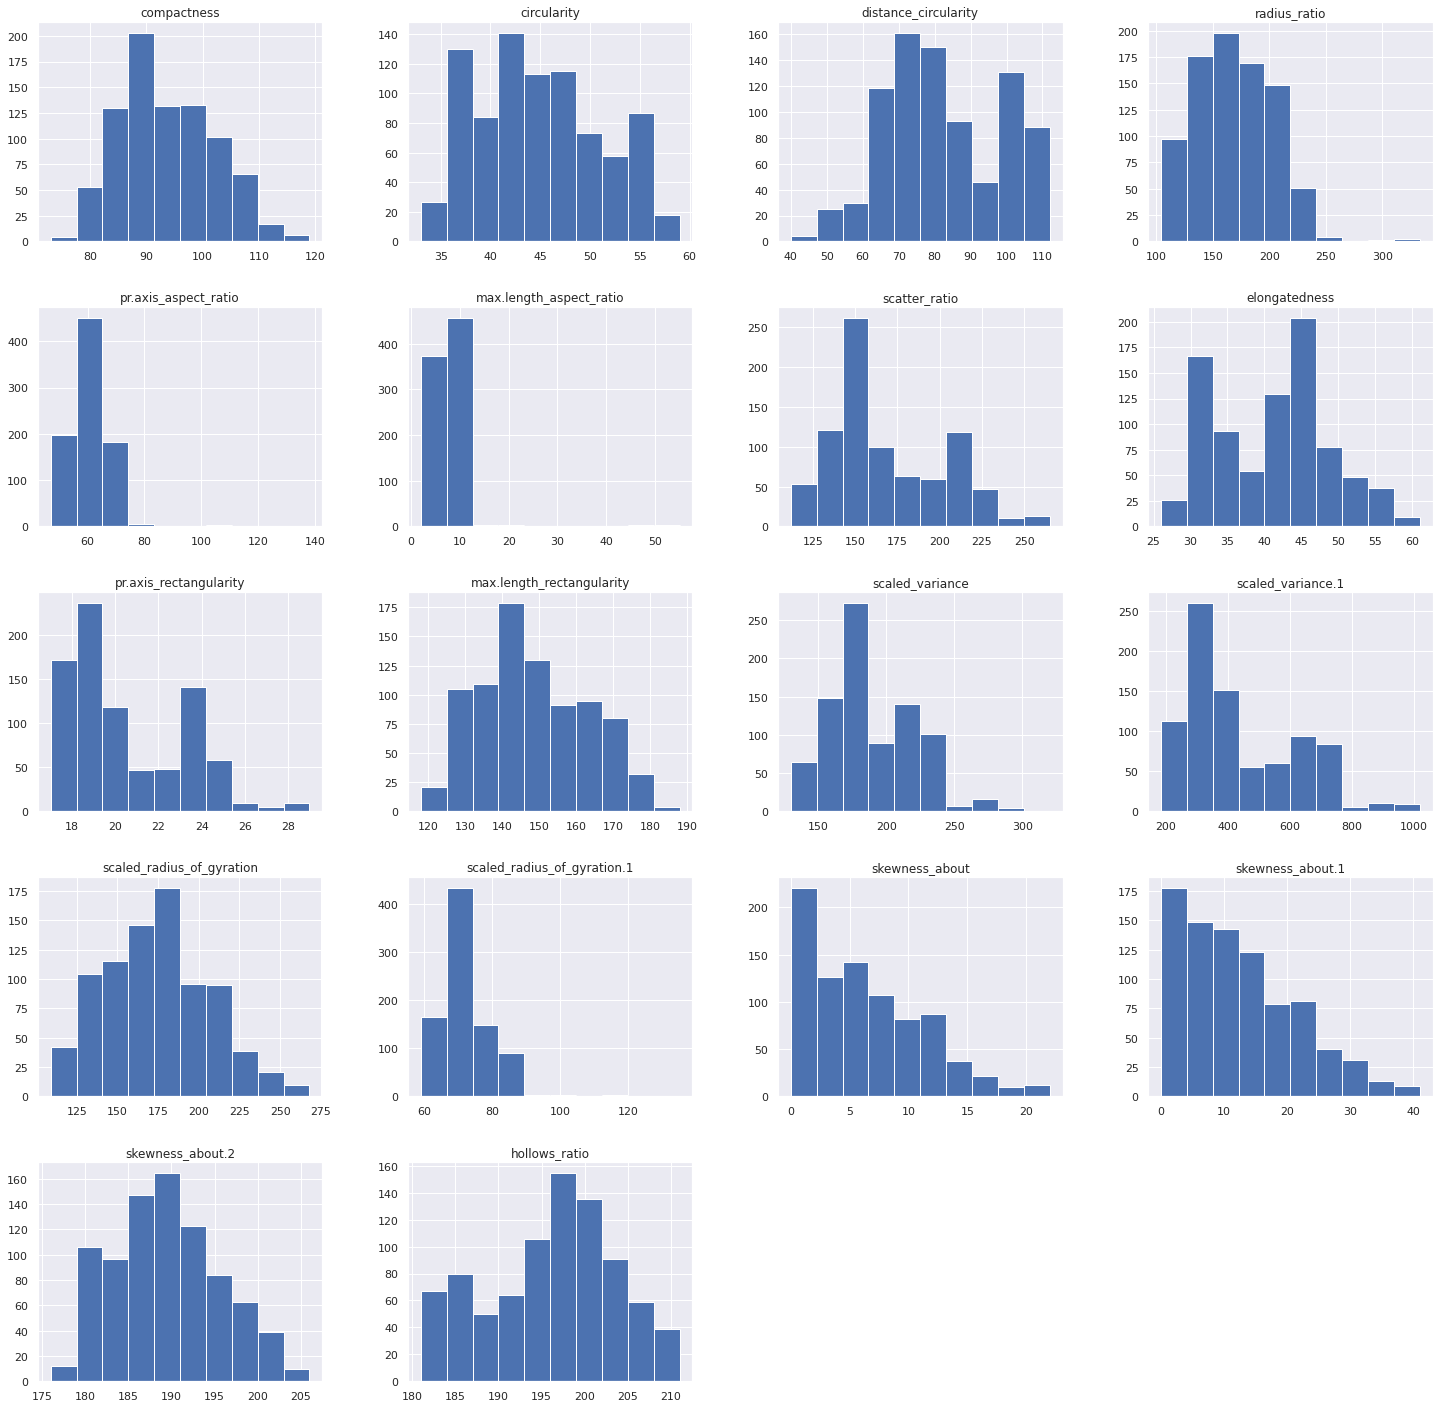

In [ ]:
# Histogram 

df.hist(figsize=(25,25))
plt.show()

### Pair Plot - Classi per feature

Questo grafico ci mostra come sono distribuite le tre classi per le prime 10 features.

in ogni subplot i due assi rappresentano i valori delle due feature analizzate (2d).

quando troviamo dati "assotigliati" sulla diagonale e' indice di una coppia di attributi molto correlati,lunghe code invece possono indicare outliers.


indicativamente e' bene trovare grafici in cui gli insiemi di punti sono chiaramente separati tra loro,
ovviamente e' una condizione ideale.




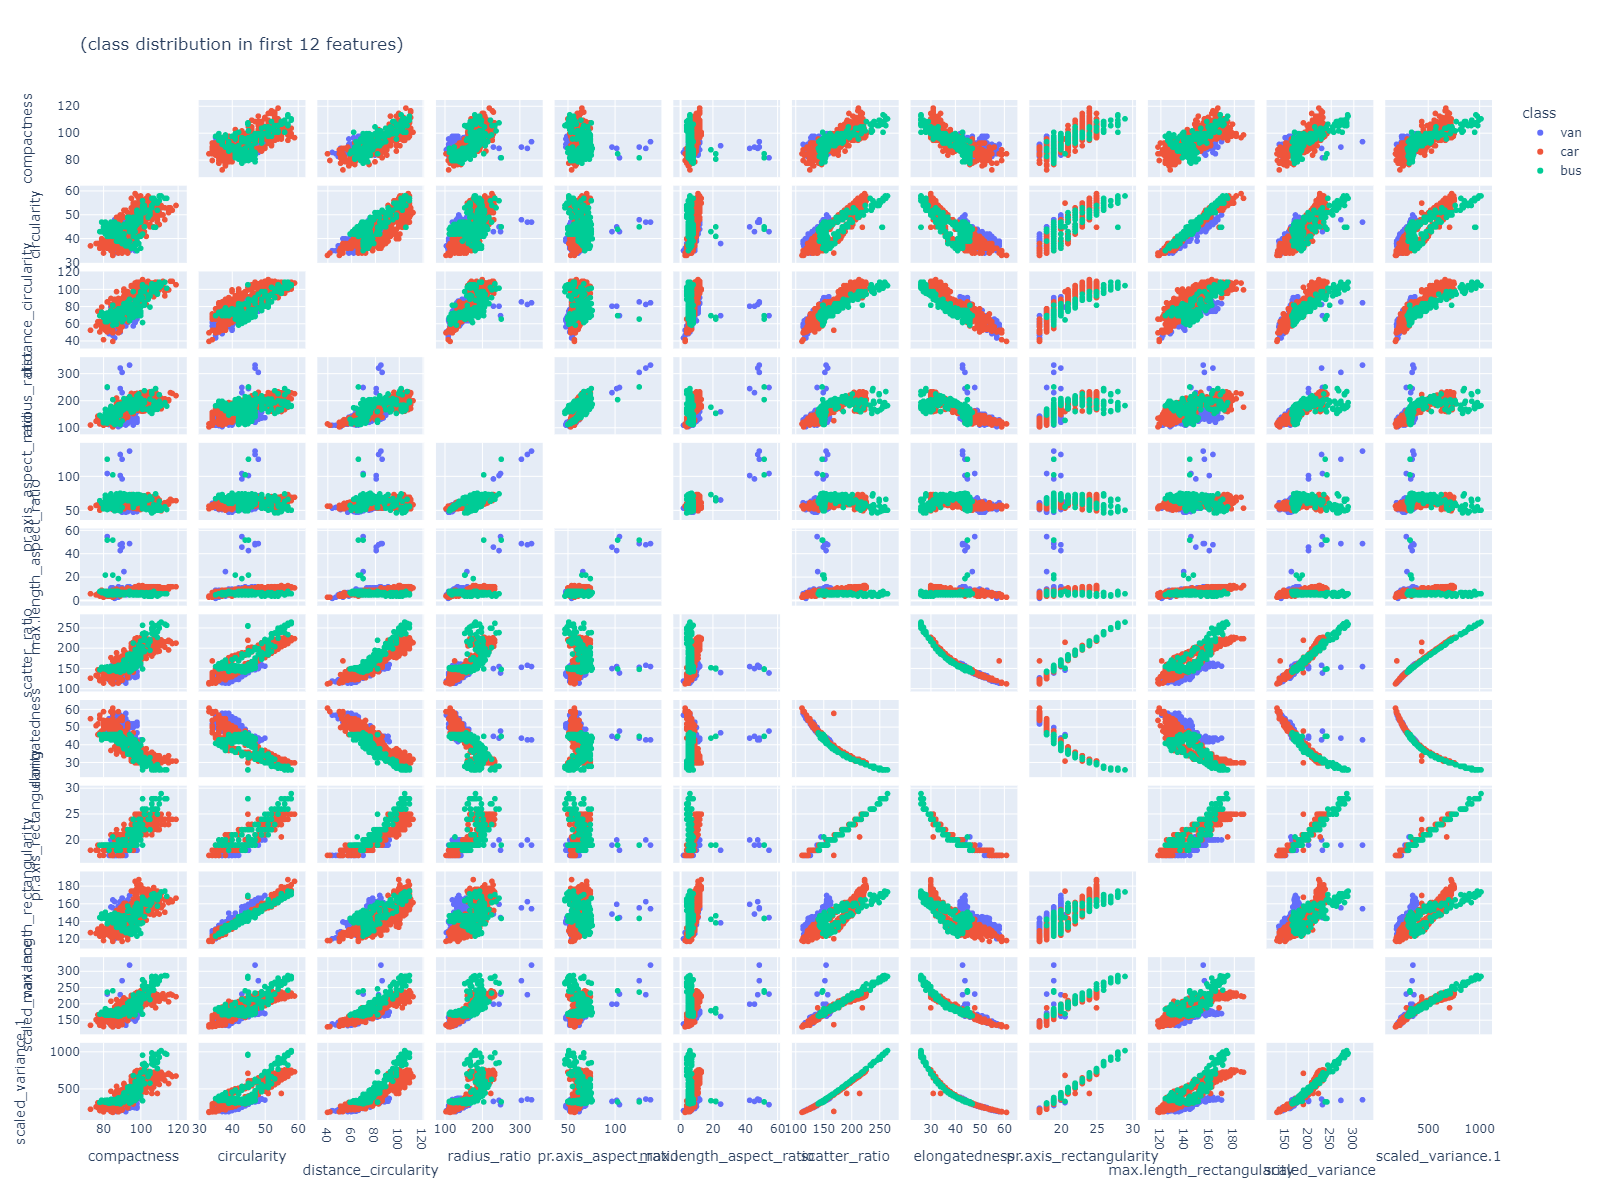

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('drive/MyDrive/datasets/pairplot.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

# plotly.express as px
# plt.figure(figsize = (30,30))
# fig = px.scatter_matrix(
#     df,
#     dimensions=df.columns[:12],
#     color="class",
#     height=1600,
#     width=1920,
#     title="(class distribution in first 12 features)"
# )
#fig.update_traces(diagonal_visible=False)
# fig.show()
# from IPython.display import Image
# import seaborn as sns
# import matplotlib.pyplot as plt 

# pair = df.copy()
# pair = pair.sample(400)
# take only last 8 features
# sns.set_style("whitegrid");
# sns.pairplot(pair,diag_kind='kde',hue='class')

# plt.show()'''

### Correlation matrix and heatmap

Dall'heatmap possiamo vedere le fetures altamente correlate, per facilita' di visualizzazione vengono visualizzati solo i dati del triangolo inferiore della matrice con (|corr|>0.6)



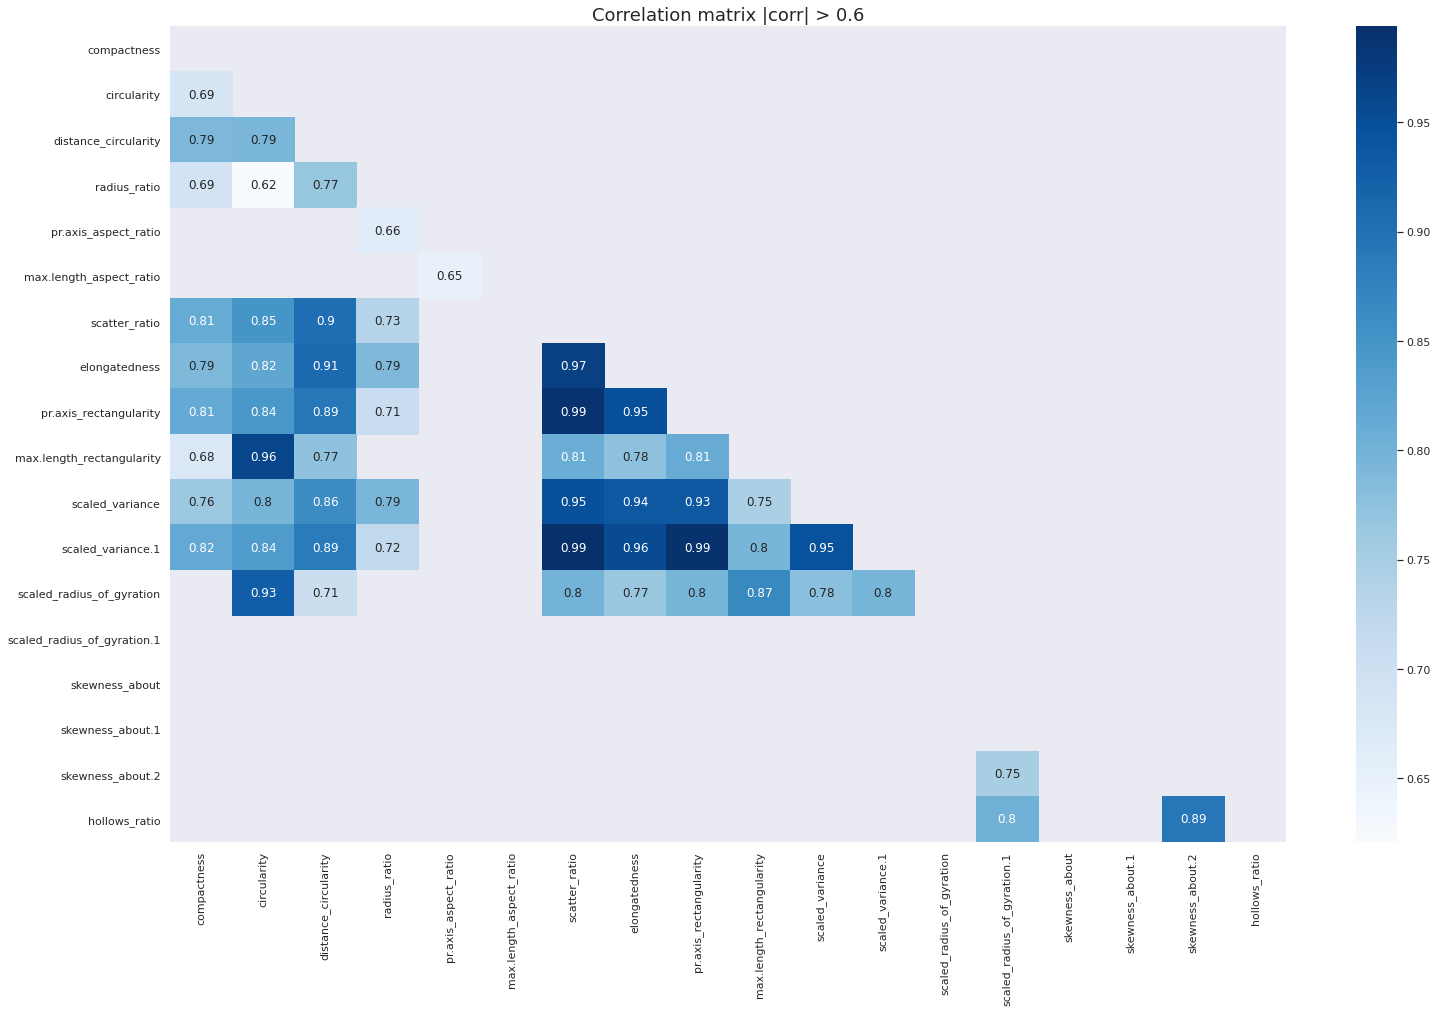

In [ ]:
plt.figure(figsize = (25,15))
corr=abs(df.corr())
lower_triangle  = np.tril(corr, k = -1)
mask = lower_triangle < abs(0.6) #Mask the correlation less than 0.6
sns.heatmap(lower_triangle,xticklabels = corr.index, yticklabels = corr.columns, annot = True,cmap= 'Blues', mask = mask)
plt.title('Correlation matrix |corr| > 0.6',fontsize=18)
plt.show()

Dalla matrice di confusione possiamo notare che ci sono molte features altamente correlate (|corr| >0.6) tra cui:
- scaled_variance_1 - scatter_ratio (corr=1)
- scaled_variance - scatter_ratio (corr=0.95)
....

questo significa che piu attributi possono essere riassunti da uno solo, ora potremmo manualmente rimuovere gli attributi, oppure applicare una PCA, sceglieremo questa via.

<a class="anchor" id="ManipolazioneDataset"></a>

# Manipolazione dataset

Dopo una prima analisi sui dati, andremo a preparare e ottimizzare il dataset in maniera tale da essere pronto  per il train dei classificatori, nello specifico le fasi sono:

- **Split del dataset** 
- **Normalizzazione** 
- **Bilanciamento classi nel train set**


## Split dataset


ci sono diversi modi per suddividere il dataset, ovviamente le % possono dipendere molto dal tipo di problema in gioco e dall'algoritmo da utilizzare, ma anche dalla disponibilita' di dati in se'.



uno dei possibili rischi di una cattiva gestione del dataset ad esempio potrebbe essere l'overfitting, ovvero quella situazione in cui il nostro algoritmo e' molto preciso in dati simili a quelli in fase di training ma completamente inaffidabile su dati mai visti.


analizziamo due modi per splittare il dataset,in entrambi i casi i samples verranno presi in maniera random ma cercando di stratificare la quantita' di classi per ciascun split:

- **3 set**: train+validation+test
- **2 test**: train+test e successifamente kfold in fase di validation.





lo split di **validation** verra' usato in una prima fase esplorativa per fare il tuning degli iperparametri da usare dutrnte la fase di training vera e propria, questo poiche' fare il tuning degli iperaparatri sul dataset di train potrebbe essere davvero dispendioso.

lo split di **training**  verra' usato per allenare/inizializzare gli algoritmi

lo split di **test** rappresenta i dati incogniti da classificare, e' importante che questo split rispecchi quanto piu' possibile i dati reali.
solo su questo split andremo a misurare la bonta' dei vari classificatori










### Split mode 1) train + test + validation
Splitting dataset (in a stratified way: balanced class for each dataset) in 3 sets:
- train (70%) : the dataset in which we will train our algorithms
- validation (15%) : the test dataset in which we will optimize the hyperparameters of the algorithms 
- test (15%): the final test dataset

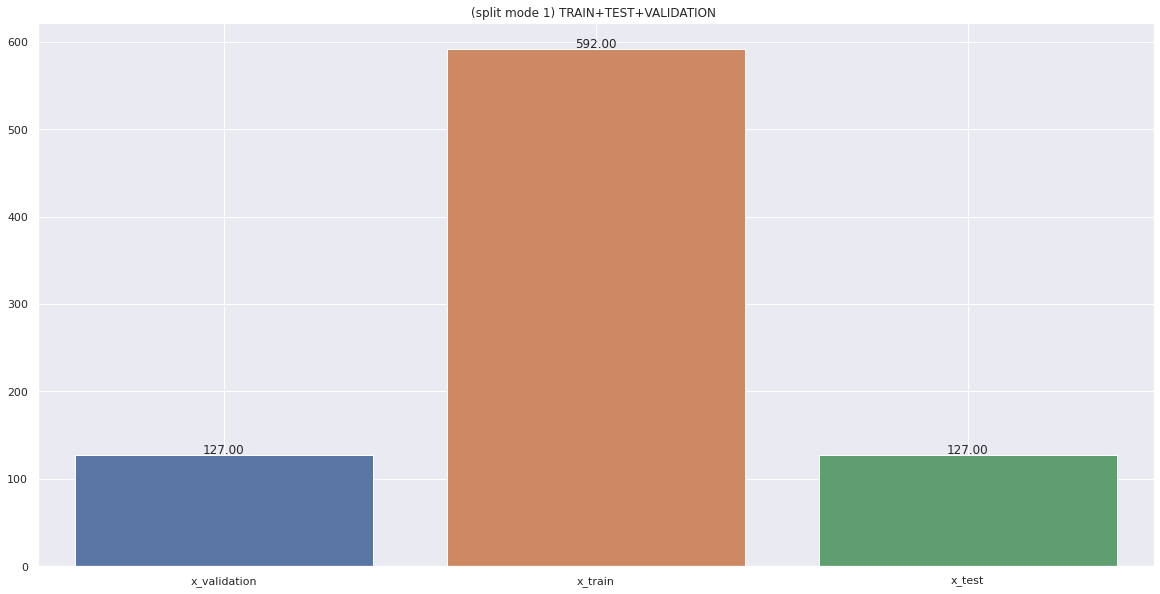

In [ ]:
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

#split first two attributes dataset (1)
x = df.loc[:, df.columns != 'class'] # all row,first two col
y = df['class'] # labels

''' Split randomly and stratified train,validation,test (3)
#stratify balance the splits with the data given in y'''

# FIRST WAY
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=1 - train_ratio,stratify=y,random_state=9)
x_validation , x_test, y_validation, y_test = train_test_split(x_temp, y_temp, test_size=test_ratio/(test_ratio + validation_ratio),
                                                               stratify=y_temp,random_state=9)


mydict={"x_validation":[len(x_validation)],"x_train":[len(x_train)],"x_test":[len(x_test)]}
sizes= pd.DataFrame.from_dict(mydict)

plot_bar_plot(sizes,title="(split mode 1) TRAIN+TEST+VALIDATION ")

### Split mode 2) train+test

Questo e' il modo piu' standard per suddividere il dataset

- train (80%) -> Successivamente useremo questo split per il train dei modelli e validazione dei parametri
 
- test (20%) 

TOTAL len: 846
Train len: 676
Test len: 170


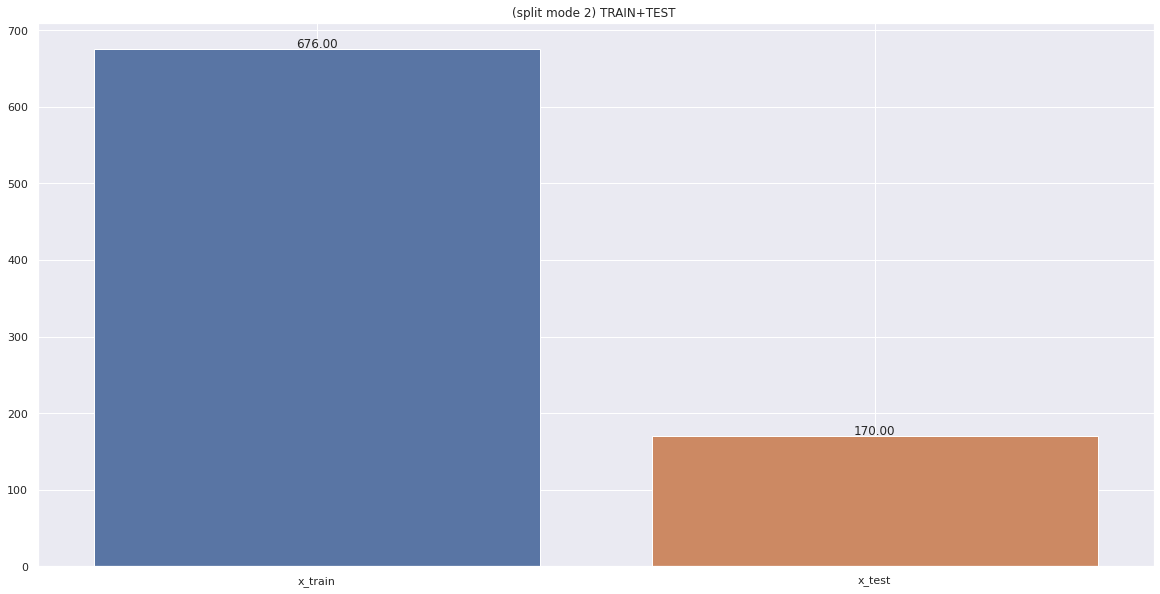

In [ ]:

# SECOND WAY
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=9)
mydict={"x_train":[len(x_train)],"x_test":[len(x_test)]}
sizes= pd.DataFrame.from_dict(mydict)
plot_bar_plot(sizes,title="(split mode 2) TRAIN+TEST ")

print(f"TOTAL len: {len(x)}")

print(f"Train len: {len(x_train)}")
#print(f"Validation len: {len(x_validation)}")
print(f"Test len: {len(x_test)}")

## Normalizzazione

Poiche' i dataset spesso hanno dati con grandezze (e unita' di misura/scala) eterogenee fra loro, e poiche' molti modelli si basano sulle distanze ed alcuni si aspettano dati distribuiti in maniera normale,
abbiamo bisogno di normalizzare i dati per rendere la classificazione piu' robusta.



utilizzeremo lo standard scaler di scikitlearn.

l'idea e' quella di trasformare i dati in una distribuzione con media=0 e deviazione standard (scarto quadratico medio)=1

ogni valore verra' normalizzato cosi: **$z=\frac{(x-mean)}{std}$**	

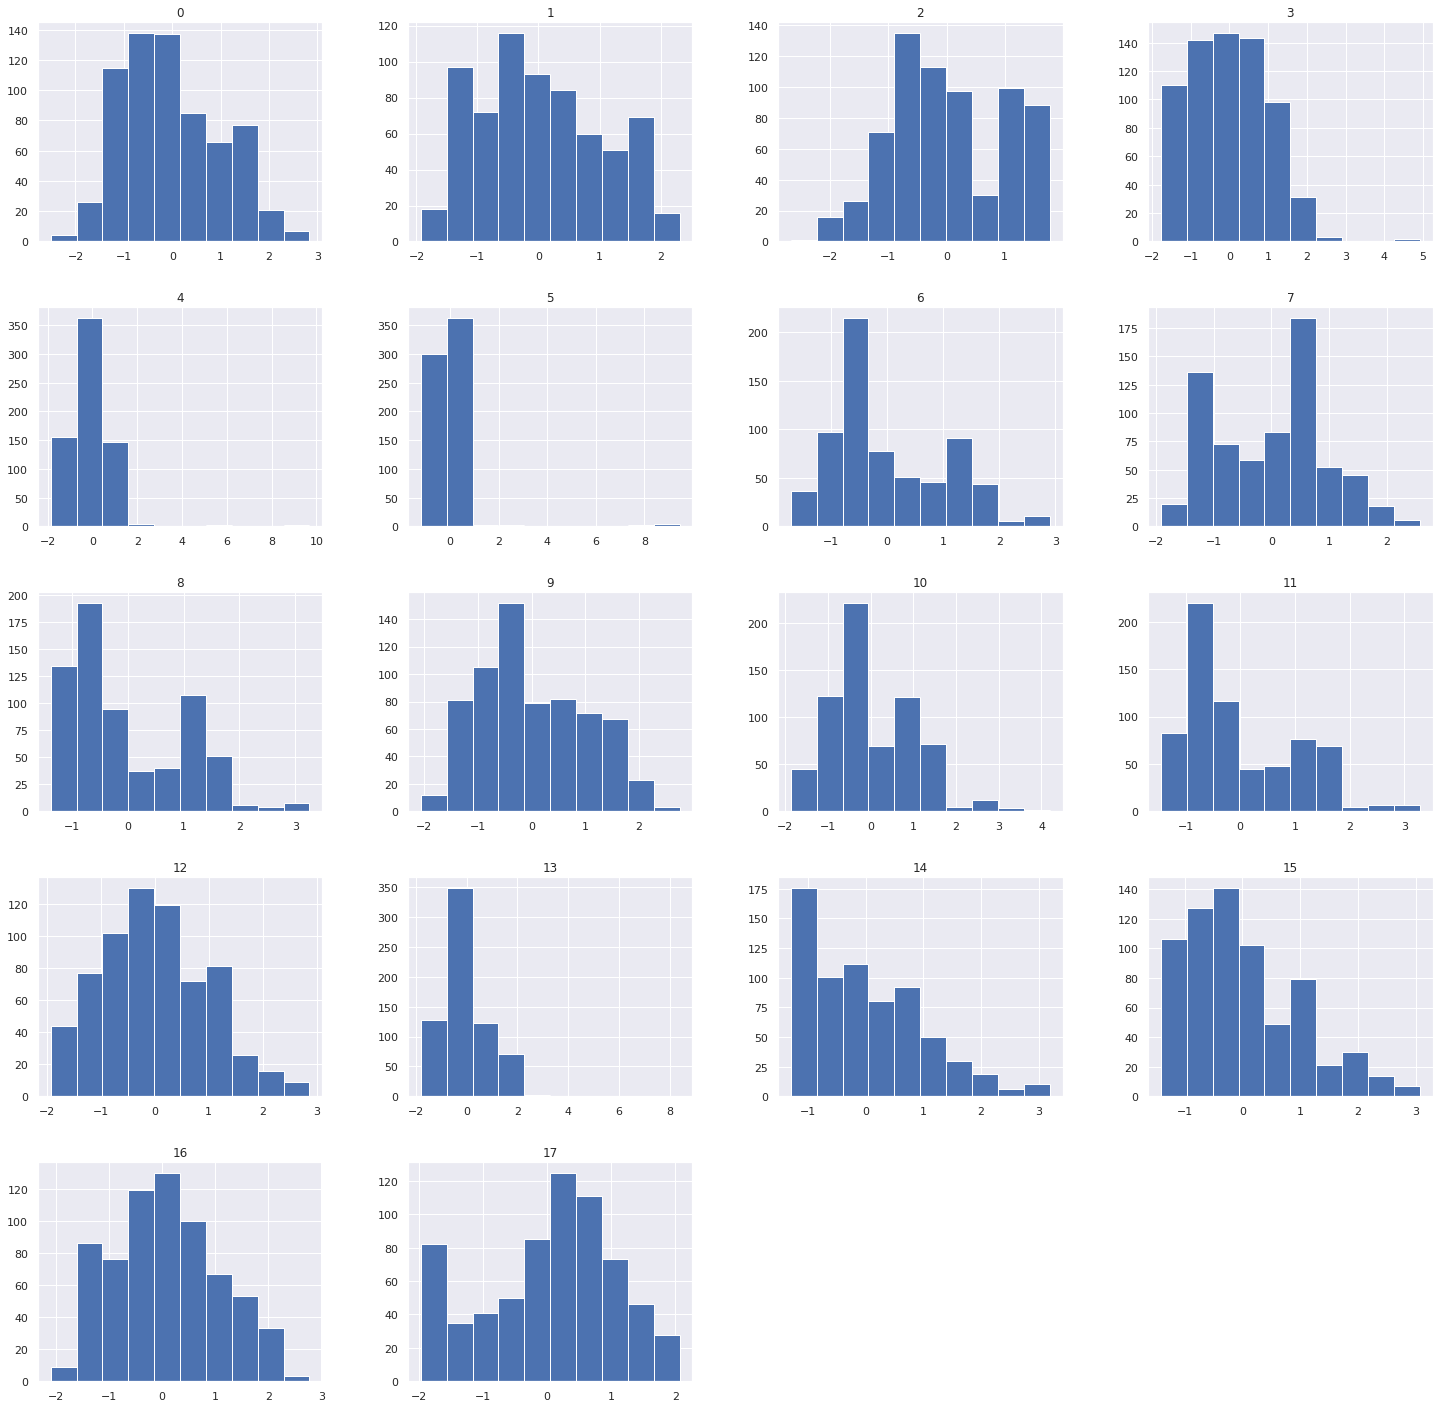

In [ ]:

#normalize
scaler = StandardScaler()
scaler.fit(np.concatenate((x_train, x_test)))
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

df=pd.DataFrame(x_train)
df.head()

# Histogram 


df.hist(figsize=(25,25))
plt.show()

## Bilanciamento train set

poiche' il dataset e' sbilanciato (non tantissimo per fortuna)
(il numero di auto e' praticamente il doppio di quello di bus e van), lo andremo a bilanciare, esistono diverse tecniche:

- **oversampling**: generare record per incrementare la/le classe meno numerose
- **undersampling**: rimuovere record dalla classe piu' numerosa
- **class weight**: aggiungere un parametro di peso, che andra' a influenzare la fase di training:
un peso basso andra' attribuito alla classe con maggiori sample,
contrariamente un peso alto andra' alle classi con meno sample, non modificando il dataset questa soluzione e' poco invasiva.


Andremo a bilanciare solo lo split di train,**poiche' lo split di test deve essere quanto piu' vicino a dati reali.**

proveremo a fare dell'oversampling per le classi **van** e **bus**

In [ ]:

car=0
bus=0
van=0
for val in y_train:
  if val == "car":
    car+=1
  if val == "van":
    van+=1
  if val == "bus":
    bus+=1
  
  
print(f"Total len before resample: {len(y_train)}")
print(f"Car: {car}")
print(f"Van: {van}")
print(f"Bus: {van}")


Total len before resample: 676
Car: 332
Van: 162
Bus: 162


### SMOTE oversampling



**SMOTE** e' una tenica di oversampling, permette di ribilanciare la quantita' di record per classe,generando nuovi dati sintetici.

a differenza delle tecniche classiche di oversampling, dove i nuovi record vengono generati a duplicando quelli esistenti nelle classi minori,

SMOTE usa **knn** per generare i dati sintetici:

![SMOTE](https://miro.medium.com/max/694/1*m0sr75BFm4C3kTbb84iWVQ.png)

1. seleziona dati random dalla classe minore
2. si impostano i k piu' vicini all'osservazione (tramite knn)
3. si "crea una retta" tra l'osservazione sui dati casuali e il k-vicino piu' prossimo
4. si prende un valore casuale lungo la retta



In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE() #resample all classes but not the majority class;
#oversample=oversample.fit(x_train, y_train)
x_train, y_train = oversample.fit_resample(x_train, y_train)

car=0
bus=0
van=0
for val in y_train:
  if val == "car":
    car+=1
  if val == "van":
    van+=1
  if val == "bus":
    bus+=1

print(f"Total len after resample: {len(y_train)}")
print(f"Car: {car}")
print(f"Van: {van}")
print(f"Bus: {van}")

Total len after resample: 996
Car: 332
Van: 332
Bus: 332


<a class="anchor" id="Riduzione"></a>

# Riduzione Dimensionalita'


La **Riduzione della dimensionalita'** rappresenta il processo in cui si riduce numero di attributi nel dataset,e' una trasformazione da uno spazio con tante dimensioni a uno con meno dimensioni, mantenendo comunque significative le proprieta' dei dati originali.


**Perche' e' importante**?

Nei dataset spesso incontriamo un alto numero di attributi,spesso questi attributi sono correlati tra loro (quindi l'informazione e' ridondante),
piu' e' alto il numero di attributi in un dataset piu' e' difficile lavorarci.






## PCA Analysis
Lo scopo della PCA e' quello di trovare la migliore rappresentazione dei dati riducendo la dimensionalita' del dataset.

la pca ci permette di trovare le direzioni della massima varianza nei dati, e di proiettarle su un nuovo sotto-spazio,

### Steps
- normalizza il dataset
- calcola la matrice di covarianza 
- trova gli autovettori e autovalori dalla matrice di covarianza
- ordina gli autovalori dal piu' alto al piu' basso e scegli i primi k autovettori corrispondenti.
- per trovare le prime **k componenti principali**: fai la **combinazione lineare tra i dati originali e gli autovettori scelti precedentemente.**


### Componenti principali
- sono ordinate dalla maggiore varianza (la prima componente e' quella con piu' varianza)
- sono ortogonali tra loro 




Components =  12  Total explained variance =  0.99384


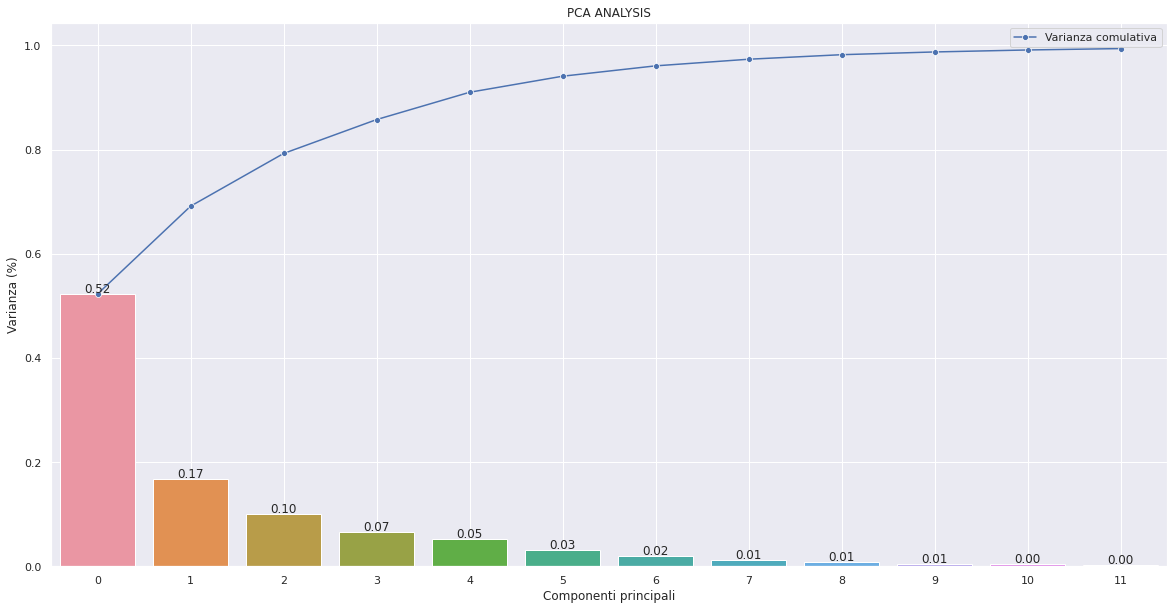

Components =  9  Total explained variance =  0.98212


In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=12)
components = pca.fit_transform(df.loc[:, df.columns != 'class']) # select all columns except class

print ( "Components = ", pca.n_components_ , " Total explained variance = ",
      round(pca.explained_variance_ratio_.sum(),5)  )


tot_var = np.sum(pca.explained_variance_)
ex_var = [(i / tot_var) * 100 for i in sorted(pca.explained_variance_, reverse=True)]
cum_ex_var = np.cumsum(ex_var)

cumulative = np.cumsum(pca.explained_variance_ratio_)
data = pd.DataFrame.from_dict({"Varianza (%)" : pca.explained_variance_ratio_,
                               "Varianza Comulativa" : cumulative,
                               "Componenti principali" : range(cumulative.__len__())})
plt.figure(figsize=(20,10))
g=sns.lineplot(data = cumulative,marker='o', sort = False , legend='brief',label="Varianza comulativa")
g=sns.barplot(data=data,x="Componenti principali" ,y="Varianza (%)",label="componenti principali")
for p in g.patches:
  g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
g.set_title("PCA ANALYSIS")
g.grid(True)
plt.show()



pca = PCA(n_components=9)
components = pca.fit_transform(df.loc[:, df.columns != 'class']) # select all columns except class
print ( "Components = ", pca.n_components_ , " Total explained variance = ",
      round(pca.explained_variance_ratio_.sum(),5)  )



Qesto grafico ci mostra la varianza (e la comulativa) delle prime 12 componenti della pca,
possiamo notare che gia' le prime 9 componenti rappresentano circa il 99% della varianza totale, in sostanza possiamo ridurre la dimensionalita' da 18 a 9 perdendo meno dell 1% della varianza totale.

<a class="anchor" id="Classificatori"></a>

# Classificatori: train e test

In [ ]:
total_scores=dict()

## Metrics

Andremo a definire dei concetti e delle metriche di valutazione:

- **Accuracy**: e' la somma dei veri positivi e veri negativi diviso il totale, e' la metrica piu' semplice


- **Precision** **$\frac{TP}{TP+FP}$**: e' il rapporto tra i veri positivi e il totale dei predetti positivi, 
non tiene conto pero' dei falsi negativi (es: classifica bus e il target e' car).

  - **ES**:Se analizziamo la  **precision** del modello sulla clase **bus**, il parametro ci indica il rapporto tra il numero dei bus predetti correttamente e la somma di tutti i bus predetti *(il modello predice bus quando il target e' car)*



- **Recall (True Positive Rate) **$\frac{TP}{TP+FN}$****: e' il rapporto tra i veri positivi e il totale dei risultati positivi

  - **ES**:Se analizziamo la  **Recall** del modello sulla clase **bus**, il parametro ci indica il rapporto tra il numero dei bus predetti correttamente e la somma di tutti i bus nel dataset.



- **F1 SCORE** **$\frac{TP}{TP+\frac{FN+FP}{2}}$** e' una media pesata tra precision e recall, e' molto utile in casi di **dataset molto sbilanciati**, non e' il nostro caso.

- **ROC CURVE** e' un grafico che mostra la curva generata dai due parametri:
    - True positive rate (recall)
    - False positive rate $\frac{fP}{TP+FN}$
- **AUC** e' l'area sotto la ROC curve, in un classificatore ideale sarebbe 1, in uno random circa 0.5, ci fornisce una misura aggregata .

## K-fold Cross-validation e Grid Search




![k_fold](https://miro.medium.com/max/724/0*PGkRo2OztSOlnG9t.png)

la convalidazione incrociata viene usata per rendere piu' robusta la fase di training del modello, rendendo il modello meno dipendente dagli split usati per train e teste.

nello specifico il k-fold consiste nel suddividere i dati totali (nel nostro caso solo il **test set)** in k parti di uguale dimenesioni

fasi:



1.   Suddividere casualmente il dataset in k splits
2.   Per ogni split:
    1. tieni lo split corrente come dataset di **test**
    2. usa gli splits rimanenti come dataset di **train**
    3. allena il modello sul train e valuta le performance sul test
    4. salva il modello (score e/o configurazioni)
3. valuta il modello migliore sul test set reale


Ovviamente e' molto importante la scelta  parametro **k** ed e' molto dipendente dal tipo di dataset,io ho utilizzato 5 split.

ovviamente il lato negativo di questa tecnica e' che i tempi di train aumentano di un fattore k, per questo e' consigliato solo su dataset con relativamente pochi record


## Grid Search

Ogni modello presenta diversi parametri, questi parametri sono estremamente dipendenti dal tipo di problema e dal tipo di dati, per trovare il classificatore piu' robusto, in aggiunta al k-fold abbiamo bisogno di fare una ricerca su quali siano gli iperparametri migliori,per questo faremo una grid search ovvero testare tutte le possibili combinazioni di parametri per trovare lo stimatore migliore.


per ogni modello in analisi useremo la funzione **GridSearchCV** che ci permette di fare una grid search con k-fold;


uno dei parametri fissi della pipeline di GridSearchCv sara' una pca a 9 componenti (fissata per tutti i modelli)






## KNN 

Knn e' uno degli algoritmi di classificazione piu semplici, lo scopo e' quello di valutare la classe di appartenenza di una entry basandosi sulla media delle classi dei k-elementi piu vicini ad essa.



i parametri disponibili sono:
- **k**: un k piu alto riduce il rumore ma genera una classificazione meno robusta
- **distance metric** 
  - **Euclidea:** $\sqrt{\sum_{i=1}^n (x_i-y_i)^2}$
  - **Manhattan:** $\sum_{i=1}^n |x_i-y_i|$
  - **Minkoswki:** $\left(\sum_{i=1}^n |x_i-y_i|^p\right)^{1/p}$ 
- **weights**
  - **Uniform:**
  - **Distance:** i punti piu' vicini avranno un peso maggiore.


Algoritmo:
1. inizializza k
2. per ogni record:
  3. calcola la distanza rispetto gli altri record
  4. ordina le distanze e prendi le k- piu' vicine.
3. classifica l'oggetto con la classe predominante (**argmax**)


Andreamo a testare il modello facendo una grid search fra i parametri disponibili. 










### Grid search k and metrics

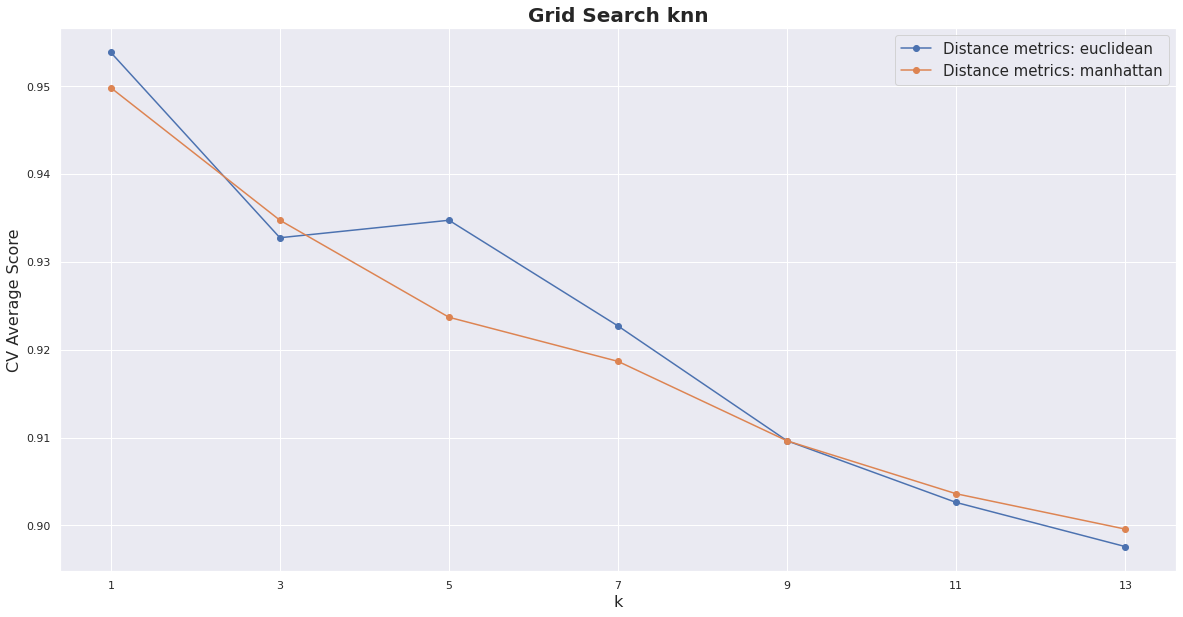

0.954 (+/-0.032) for {'knn__metric': 'euclidean', 'knn__n_neighbors': 1, 'pca__n_components': 9}
0.933 (+/-0.058) for {'knn__metric': 'euclidean', 'knn__n_neighbors': 3, 'pca__n_components': 9}
0.935 (+/-0.056) for {'knn__metric': 'euclidean', 'knn__n_neighbors': 5, 'pca__n_components': 9}
0.923 (+/-0.052) for {'knn__metric': 'euclidean', 'knn__n_neighbors': 7, 'pca__n_components': 9}
0.910 (+/-0.048) for {'knn__metric': 'euclidean', 'knn__n_neighbors': 9, 'pca__n_components': 9}
0.903 (+/-0.045) for {'knn__metric': 'euclidean', 'knn__n_neighbors': 11, 'pca__n_components': 9}
0.898 (+/-0.041) for {'knn__metric': 'euclidean', 'knn__n_neighbors': 13, 'pca__n_components': 9}
0.950 (+/-0.035) for {'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'pca__n_components': 9}
0.935 (+/-0.047) for {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'pca__n_components': 9}
0.924 (+/-0.071) for {'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'pca__n_components': 9}
0.919 (+/-0.062) for {'knn__

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix



knn = neighbors.KNeighborsClassifier()
# Parameters of pipelines can be set using ‘__’ separated parameter names:
params=[1,3,5, 7, 9, 11, 13]
weights=['uniform','distance']
metrics=['euclidean','manhattan']
param_grid = {
    'knn__n_neighbors': params, ## todo explane consequence to low/high neighborn/pca_components
    #'knn__weights': weights,
    'knn__metric': metrics,
    'pca__n_components':[9]
}
pipe = Pipeline([
        ('pca', PCA()),
        ('knn',knn)
        ])
gs = GridSearchCV(pipe, param_grid, n_jobs=-1,cv=5) # cv cross validation-> 5-fold
gs.fit(x_train, y_train)
#print(search.cv_results_)

#test_scores=[]
#for score in gs.cv_results_['mean_test_score']:
#  test_scores.append(score)

#xi = list(range(len(params)))  
#plt.xticks(xi,params)
#plt.plot(xi,test_scores, color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
#plt.xlabel("K")
#plt.ylabel("Accuracy (mean)")
#plt.title("Knn (k-param)")
#plt.show()


# Calling Method 
plot_grid_search(gs, params, metrics, 'k', 'Distance metrics',model_name="knn")



in questo grafico analizziamo la media duell'acuratezza all'aumentare del valore k.
**il numero di vicini ottimale e' 1**,ottenuto attraverso una grid search sul training set,
possiamo notare che l'accuratezza diminuisce all'aumentare del parametro k, e questo vale per entrambe le metriche di distanza: euclidea e manhattan.


### KNN Test

Accuracy on test set 0.9117647058823529
KNN_1 Classification Report:
              precision    recall  f1-score   support

         bus       0.90      1.00      0.95        36
         car       0.95      0.90      0.92        97
         van       0.84      0.86      0.85        37

    accuracy                           0.91       170
   macro avg       0.90      0.92      0.91       170
weighted avg       0.91      0.91      0.91       170



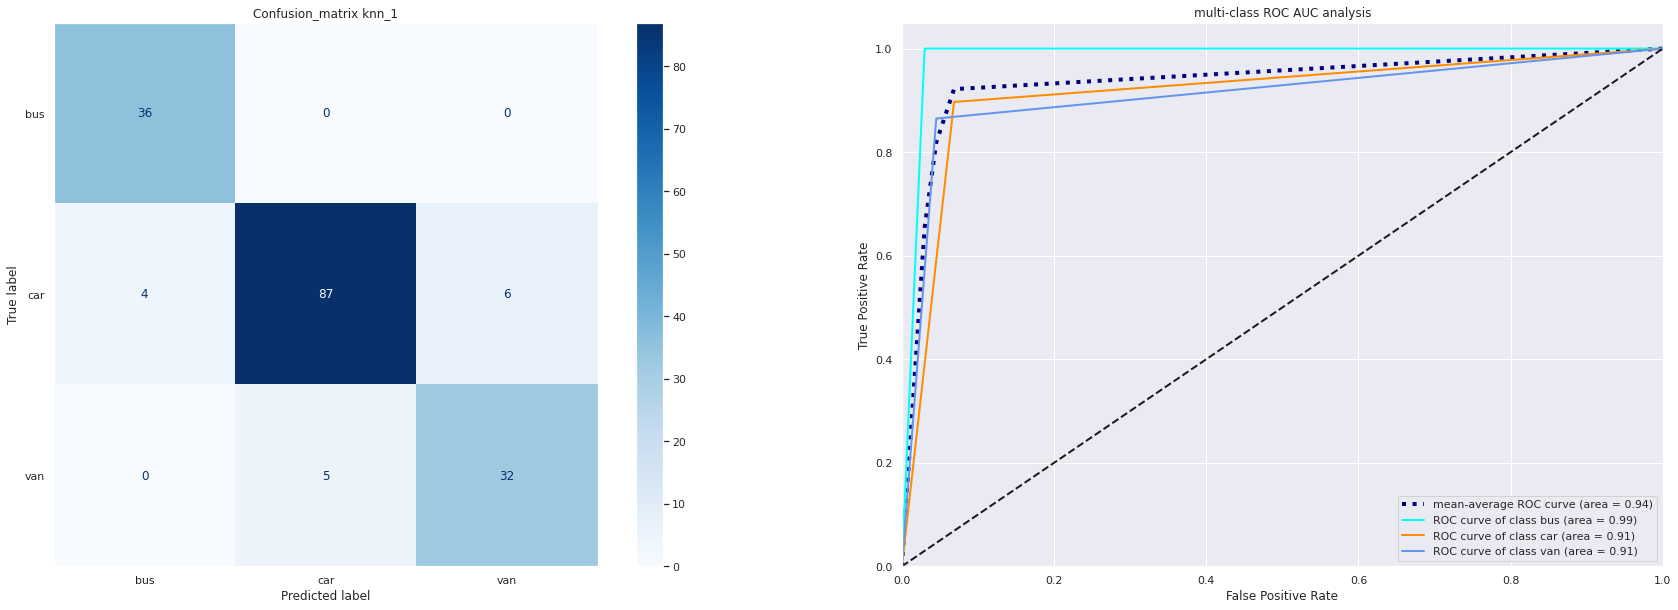

In [ ]:
analyze_predictions(gs.best_estimator_,x_train,y_train,x_test,y_test,total_scores,model_name="knn_1")

- Accuracy del miglior stimatore della grid search : 0.95
- Accuracy sul test set: 0.92



Possiamo notare che l'accuracy misurata in fase di validazione degli hyperparametri rispetto a quella reale misurata sul test set varia di circa 3%.

dal report notiamo una recall altissima per la classe bus questo ci indica in sostanza che il modello e' riuscito a classificare correttamente tutti i bus (ce lo conferma anche l'auc roc della classe bus al 99%)



## SVM (Support Vector Machine)


la support vector machine si basa sull'idea di trovare un iperpiano di separazione tra le classi che massimizza il margine tra le classi stesse.


![svm](https://www.developersmaggioli.it/wp-content/uploads/2019/05/Cattura.png)

i **vettori di supporto** sono i dati al margine dell'iperpiano (la stella e i triangoli indicati), generano essi stessi l'iperpiano di separazione e sono gli unisci a influire in fase di classificazione.

Possiamo considerare i vettori di supporto anche come gli esempi di dati piu' difficili da classificare, poiche' stanno a cavallo tra una classe e l'altra.


il **margine** e' definito come la distanza fra l'iperpiano di separazione e i vettori di supporto,generalmente margini alti riescono a discriminare in maniera robusta, margini bassi sono piu' soggetti all'overfitting


![svm2](https://miro.medium.com/max/1465/1*PiGj6vEyBhxbXfK4bzwwTg.png)
- **Hard margin**:
  se i dati sono linearmente separabili possiamo selezionare due iperpiani paralleli che separano le classi massimizzandone il margine.
- **Soft margin**:
  spesso i dati non sono linearmente separabili, una soluzione attraverso soft margin e' quella di permettere ad alcuni punti di violare la separazione dell'iperpiano (relaxation) in maniera tale da avere un margine alto ma con qualche eccezione, (migliore che avere un margine basso ma con nessuna eccezione)


quando i dati **non sono linearmente seraparabili** si puo' usare una trasformazione che mappa i dati in uno spazio a dimensione maggiore dove i dati diventano linearmente separabili da un iperpiano.

questo approccio e' problematico dal punto di vista del calcolo e delle prestazioni, per questo si ricorre al **kernel trick**
ovvero usare una **funzione kernel** che ci consente di ottenere lo stesso risultato ma computazionalmente piu' efficiente




**Parametri:**
- **C** e' una misura su quanto è importante evitare classificazioni errate,in 
  - c basso: genera un margine alto (probabilita' di outliers)
  - c alto: genera un margine basso
- **Gamma** : determina l'influenza della distanza di un singolo sample
  - gamma bassa: anche punti distanti stanno considerati dal classificatore
  - gamma alta: solo i punti vicini sono considerati dal classificatore

**funzioni kernel**:
- **rbf**: radial base function
- **polinomial**
- **sigmoid**

![kernel](https://miro.medium.com/max/1783/1*Z1q39VP188OdPeft0MVncQ.png)


nella grid search andremo a valutare il parametro c e qualche funzione kernel, mentre lasceremo gamma predefinita.



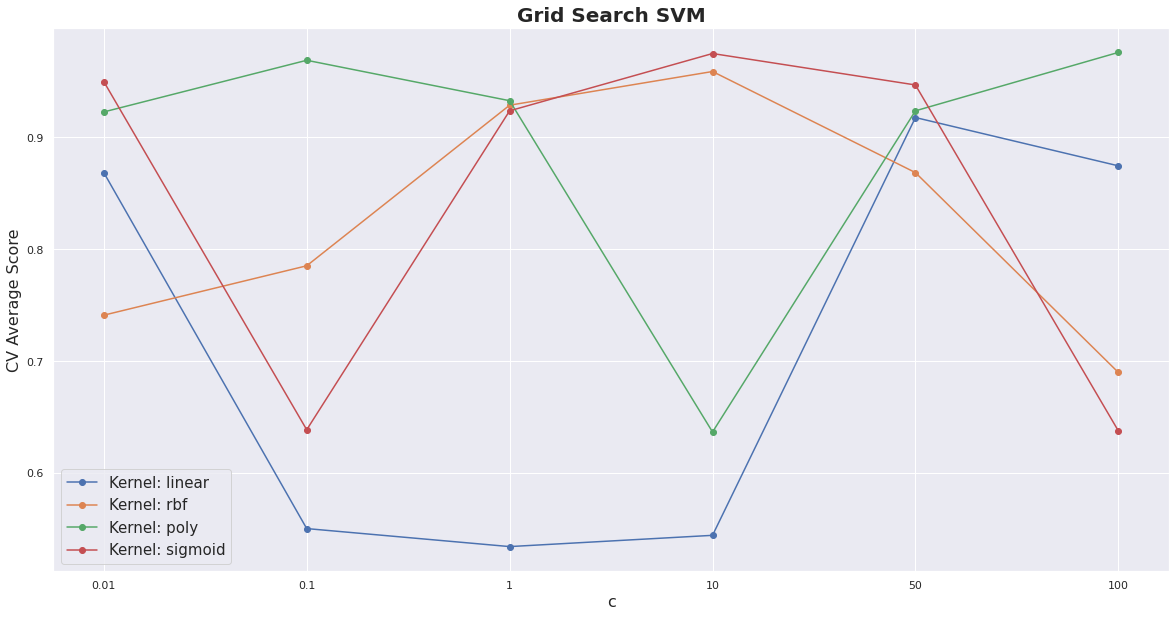

0.868 (+/-0.055) for {'pca__n_components': 9, 'svm__C': 0.01, 'svm__kernel': 'linear'}
0.550 (+/-0.182) for {'pca__n_components': 9, 'svm__C': 0.01, 'svm__kernel': 'rbf'}
0.534 (+/-0.052) for {'pca__n_components': 9, 'svm__C': 0.01, 'svm__kernel': 'poly'}
0.544 (+/-0.034) for {'pca__n_components': 9, 'svm__C': 0.01, 'svm__kernel': 'sigmoid'}
0.918 (+/-0.050) for {'pca__n_components': 9, 'svm__C': 0.1, 'svm__kernel': 'linear'}
0.874 (+/-0.045) for {'pca__n_components': 9, 'svm__C': 0.1, 'svm__kernel': 'rbf'}
0.741 (+/-0.065) for {'pca__n_components': 9, 'svm__C': 0.1, 'svm__kernel': 'poly'}
0.785 (+/-0.033) for {'pca__n_components': 9, 'svm__C': 0.1, 'svm__kernel': 'sigmoid'}
0.929 (+/-0.056) for {'pca__n_components': 9, 'svm__C': 1, 'svm__kernel': 'linear'}
0.959 (+/-0.046) for {'pca__n_components': 9, 'svm__C': 1, 'svm__kernel': 'rbf'}
0.868 (+/-0.048) for {'pca__n_components': 9, 'svm__C': 1, 'svm__kernel': 'poly'}
0.690 (+/-0.068) for {'pca__n_components': 9, 'svm__C': 1, 'svm__kern

In [ ]:


svm_=svm.SVC(probability=True)
c=[ 0.01, 0.1, 1, 10,50, 100]
kernels=['linear','rbf','poly','sigmoid']

gamma_values = [0.001, 0.01, 0.1, 1,10]
param_grid = {
    'svm__C': c, ## todo explane consequence to low/high neighborn/pca_components
    #'svm__gamma': gamma_values,
    'svm__kernel': kernels,
    'pca__n_components':[9]
}
pipe = Pipeline([
        ('pca', PCA()),
        ('svm',svm_)
        ])


gs = GridSearchCV(pipe, param_grid, n_jobs=-1)
gs.fit(x_train , y_train)
plot_grid_search(gs, c, kernels, 'c', 'Kernel',model_name="SVM")


In questo grafico analizziamo l'accuratezza di diversi kernel al variare del parametro c, notiamo che hanno comportamenti eterogenei tra loro per poi allinearsi mediamente sul valore c=50

### SVM Test

Accuracy on test set 0.9705882352941176
SVM_C_100_RBF Classification Report:
              precision    recall  f1-score   support

         bus       1.00      1.00      1.00        36
         car       0.98      0.97      0.97        97
         van       0.92      0.95      0.93        37

    accuracy                           0.97       170
   macro avg       0.97      0.97      0.97       170
weighted avg       0.97      0.97      0.97       170



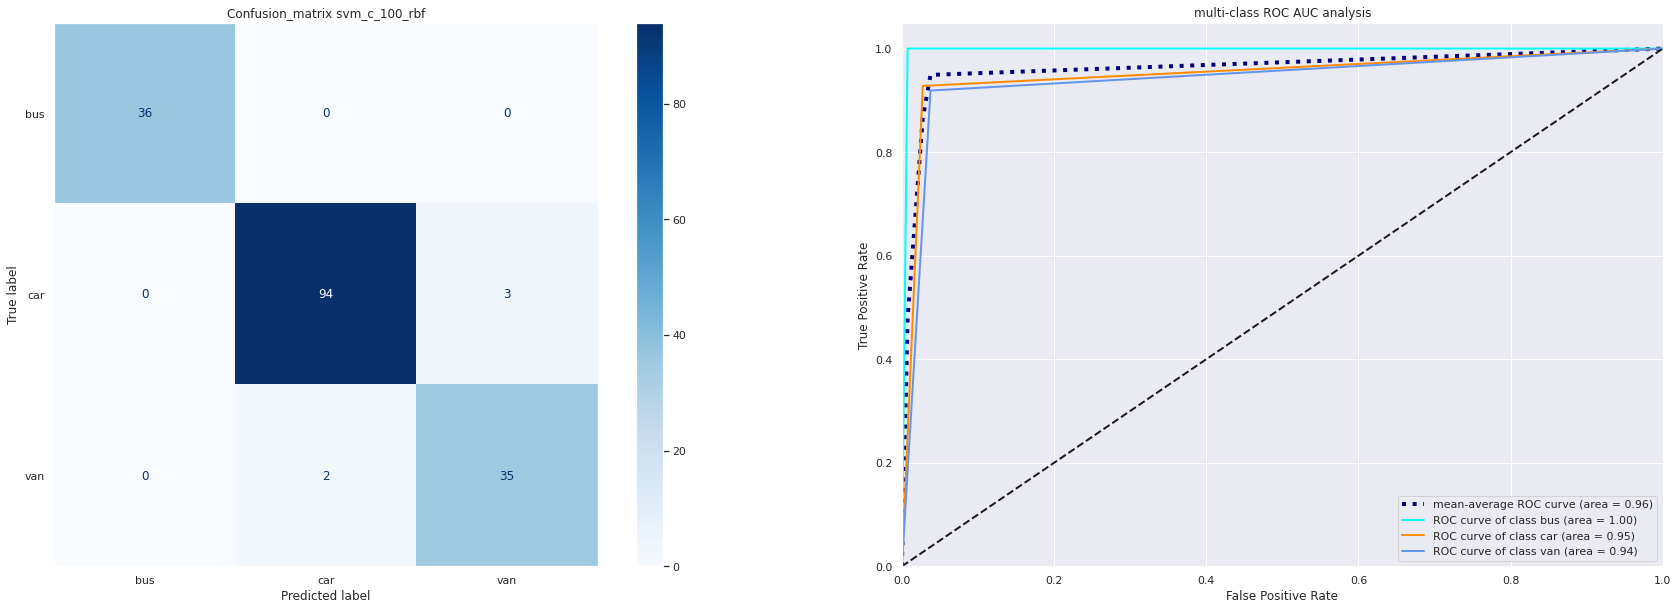

In [ ]:

analyze_predictions(gs.best_estimator_,x_train,y_train,x_test,y_test,total_scores,model_name="svm_c_100_rbf")


Come nel caso della knn anche qui la classe che ha dato migliori risultati e' bus, dove non solo il classificatore ha classificato correttamente tutti i bus, ma ha anche evitato di classificare altre classi come bus (falsi positivi)

la classe car si comporta anche deciamente bene (solo 3 falsi negativi dalla matrice di confusione)

## NAIVE BAYES
 

il classificatore Naive Bayes, si basa sull'applicazione del teorema di Bayes.
Naive (ingenuo) perche' assume l'independenza dei dati,
questa assunzione semplifica di gran lunga la computazione.




**Teorema di Bayes**: 
- $P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$

*(potremmo leggerla come la probabilita' di classe 'auto' dati questi attributi)*

  - $P(A)$ e' la probabilita' (a priori) dell'evento a 
      - es: $P(class=auto)$
  - $P(B)$ e' la probabilita' (a priori) dell'evento b 
      - es: $P(compactness=10)$
  - $P(A|B)$ probabilita' (a posteriori) dell'evento A sapendo che l'evento B si e' verificato 
      - es:$ P(class=car | compactness=10)$
  - $P(B|A)$ 
      - es:$ P(compactness=10| class=car)$


### **indipendenza dei dati**

Il classificatore assume l'indipendenza dei dati per poter trattare attributi multipli come indipendenti,
con quest'assunzione possiamo semplificare questa probabilita' condizionata

- $P(B1,B2,B3,…,Bn| A) = P(B1|A) * P(B2|A) * P(B3|A) *…* P(Bn|A)$ 

che nel nostro dataset potremmo vedere come:

- $P(compactness=0.1,scatter=0.2,circularity=0.5|class=car)$ =$ P(compactness=0.1|class=car) * P(scatter=0.2|class=car) * P(circularity=0.5|class=car) $

Steps:
1. Calcolare la probabilita' a priori per ciascuna classe **P(A)** (ovvero quante classi 'car','bus','van' ci sono nel dataset di train sul totale=
2. calcolare la **probabilita' a priori** per ciascun attributo **P(B)**  
3. calcolare la **probabilita a P(B|A)** per ciascuno attributo e ciascuna classe
3. classifica con il teorema di bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
param_grid = {
    'reduce_dim__n_components':[9]
}
pipe = Pipeline([
        ('scaler', MinMaxScaler()),
        ('reduce_dim', PCA()),
        ('nb',bayes)
        ])
gs = GridSearchCV(pipe, param_grid, n_jobs=-1)
gs.fit(x_train , y_train)
#print("Best parameter (CV score=%0.3f):" % gs.best_score_)
#print(gs.best_params_)
print("No gridsearch")

No gridsearch


### NB TEST

Accuracy on test set 0.8647058823529412
NAIVE BAYES Classification Report:
              precision    recall  f1-score   support

         bus       0.75      0.92      0.83        36
         car       0.95      0.84      0.89        97
         van       0.80      0.89      0.85        37

    accuracy                           0.86       170
   macro avg       0.84      0.88      0.85       170
weighted avg       0.88      0.86      0.87       170



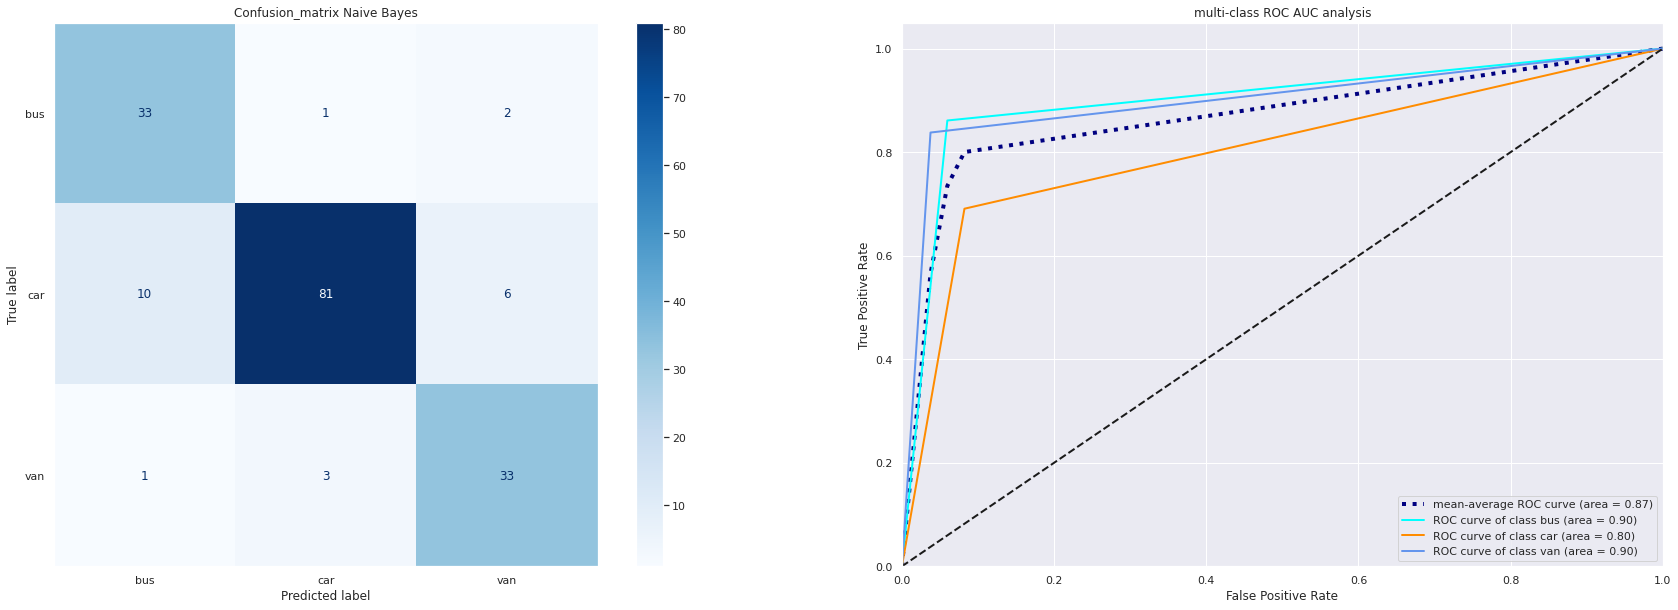

In [ ]:
analyze_predictions(gs.best_estimator_,x_train,y_train,x_test,y_test,total_scores,model_name="Naive Bayes")

Il naive bayes e' l'algoritmo che si e' comportato peggio, contrariamente ai precedenti la classe piu' problematica e' proprio bus cona una precision del 75%, questo perche' 10 auto sono state classificate come bus.



<a class="anchor" id="Comparazione"></a>

# Comparazione e conclusioni

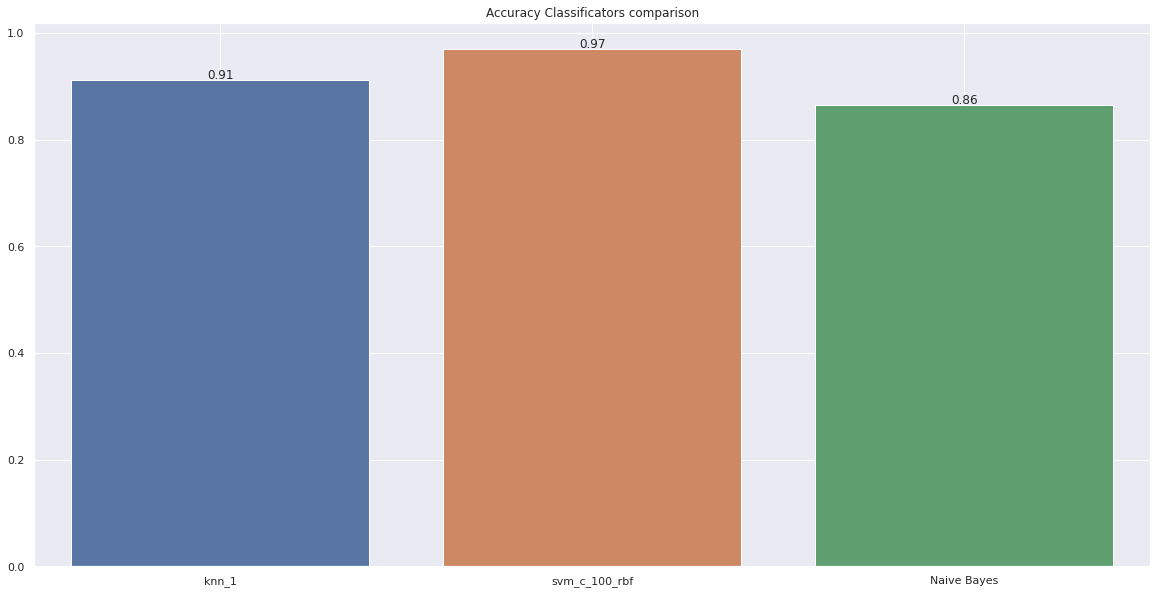

,accuracy,precision (mean),recall (mean),roc_auc (mean)
knn_1,0.911765,0.895919,0.920591,0.936386
svm_c_100_rbf,0.970588,0.966740,0.971673,0.962383
Naive Bayes,0.864706,0.835940,0.881203,0.868364


In [ ]:

#print(total_scores)


accuracy=dict()

for model_name,score in total_scores.items():
  accuracy[model_name]=[score.get("accuracy")]


accuracy_data=pd.DataFrame.from_dict(accuracy)

plot_bar_plot(accuracy_data,title="Accuracy Classificators comparison")

plt.show()


stats_data=pd.DataFrame.from_dict(total_scores)
display(stats_data.T)


Tutti e tre i modelli hanno avuto tuttavia score molto positivi

l'acccuratezza piu' bassa e' del Naive Bayes (e anche le altre metriche sono le piu basse)



L'algoritmo invece che si e' comportato in maniera migliore e' la svm, su tutte le metriche ha sorclassato gli avversari archiviando un accuratezza del 97%.

il knn si posiziona tra i due.



In [ ]:
!jupyter nbconvert --to html /content/drive/MyDrive/Colab\ Notebooks/Vehicle_classification.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Vehicle_classification.ipynb to html
[NbConvertApp] Writing 2173649 bytes to /content/drive/MyDrive/Colab Notebooks/Vehicle_classification.html


In [ ]:
!jupyter nbconvert --to html /content/drive/MyDrive/Colab\ Notebooks/Vehicle_classification.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Vehicle_classification.ipynb to html
[NbConvertApp] Writing 2172696 bytes to /content/drive/MyDrive/Colab Notebooks/Vehicle_classification.html
